## USE CASE_ai4industry: Maison Paries


**Attendus :**  Un rapport nous permettant de connaître les spécificités de nos clients 

  - Leur profil
  - Leurs attentes
  - Les raisons qui les amènent à venir chez nous
  - Ce qu’ils recherchent…

### Packages

In [9]:
#******
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import warnings
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline
#******
from pandas_ods_reader import read_ods
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.compose import ColumnTransformer, make_column_selector,make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
set_config(display='diagram')
warnings.filterwarnings('ignore')
#********
from codes_pkges.classifcationmodels import*
from codes_pkges.functions import *
from codes_pkges.encoding_functions import *
from codes_pkges.opersfunctions import *
#********

### DATA ANALYZE

**Retrieving datasets**

In [4]:
#Reading datasets
data_winter= pd.read_excel("etudfinal1.xlsx") 
path = "etudfinal.ods"
data_summer = read_ods(path)

In [6]:
#** to show all the rows of the dataset **
pd.set_option('display.max_row',data_winter.shape[0])
pd.set_option('display.max_row',data_summer.shape[0])

#** to show all the columns of the dataset **
pd.set_option('display.max_columns',data_winter.shape[1])
pd.set_option('display.max_columns',data_summer.shape[1])

**Insight datasets**

In [7]:
data_winter.head(3)

,Horodateur,Unnamed: 1,Unnamed: 2,Boutique,code postal,Depuis combien de temps êtes vous un client de la Maison Pariès ?,A quelle fréquence venez-vous nous rendre visite ?,Comment nous avez-vous connus ?,"En 2 mots, comment définiriez-vous la Maison ?",A quelle(s) occasion(s) effectuez-vous des achats chez nous,Quel est le produit que vous préférez ?,Quel est le dernier produit de la gamme Pariès que vous connaissez ?,8. Quels sont les produits de nos gammes que vous achetez chez d’autres artisans ?,Pourquoi ?,Où achetez-vous nos produits ?,Avez-vous déjà eu l’occasion de commander nos produits sur notre site en ligne ?,"Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?",Que devons-nous faire pour progresser ?,"14. Dans les grandes évolutions de la consommation, quelles sont les 3 qui vous tiennent le plus à cœur ?",Sexe,Quelle est votre catégorie socio-professionnelle ?,Tranche d'âge,de combien de personnes se compose votre foyer ?,"S'il y a des enfants dans votre foyer, quel âge ont-ils ?",Êtes-vous abonné à notre newsletter ?,"Si non, confiez-moi votre adresse mail pour recevoir notre actualité (moins de 10 mails par an)"
0,2021-09-27 14:22:51,44466,0.593750,Socoa,64310,Depuis quelques années,visite mensuelle,bouche à oreille,Mouchous; glaces,pour me faire plaisir; quand je reçois du mond...,Gateau basque creme,Les petites s noisette,Gateau basque,Ceka depend d'ou elle est,En fonction de l'endroit où je me trouve,Non,NaN,NaN,Alimentation santé bien être et transparence; ...,Femme,Cadre et profession intellectuelle supérieure,35/49,4.0,NaN,Oui,**********
1,2021-09-27 14:28:34,44466,0.598611,Socoa,80209,C’est une de mes premières visites,C'est la première fois !,par hasard en passant devant,Artisanat; gastronomique,pour me faire plaisir,NaN,NaN,Gateau basque,Le lieu,Toujours dans la même boutique,Non,oui,NaN,"Alimentation durable (naturalité, moins de gas...",Homme,Retraité,65 et +,2.0,NaN,Non,**********
2,2021-09-27 14:42:05,44466,0.604167,Socoa,40920,Depuis quelques années,visite mensuelle,avec vos parents; votre famille,Tres bon,pour me faire plaisir,Gateau basque a la noisette,La buche au chocolat,Les chocolats,Le lieu,Toujours dans la même boutique,Non,NaN,Des pieces montee en chocolat,"Alimentation durable (naturalité, moins de gas...",Homme,Cadre et profession intellectuelle supérieure,25/34,4.0,- de 5 ans,Non,**********


In [17]:
data_summer.head(3)

,Horodateur,unnamed.1,unnamed.2,Boutique,code postal,Depuis combien de temps êtes vous un client de la Maison Pariès ?,A quelle fréquence venez-vous nous rendre visite ?,Comment nous avez-vous connus ?,"En 2 mots, comment définiriez-vous la Maison ?",A quelle(s) occasion(s) effectuez-vous des achats chez nous,Quel est le produit que vous préférez ?,Quel est le dernier produit de la gamme Pariès que vous connaissez ?,8. Quels sont les produits de nos gammes que vous achetez chez d’autres artisans ?,Pourquoi ?,Où achetez-vous nos produits ?,Avez-vous déjà eu l’occasion de commander nos produits sur notre site en ligne ?,"Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?",Pourquoi ?.1,Que devons-nous faire pour progresser ?,"14. Dans les grandes évolutions de la consommation, quelles sont les 3 qui vous tiennent le plus à cœur ?",Sexe,Quelle est votre catégorie socio-professionnelle ?,Tranche d'âge,de combien de personnes se compose votre foyer ?,"S'il y a des enfants dans votre foyer, quel âge ont-ils ?",Êtes-vous abonné à notre newsletter ?,"Si non, confiez-moi votre adresse mail pour recevoir notre actualité (moins de 10 mails par an)"
0,2022-06-08T12:11:42,2022-06-07,PT12H06M00S,St Jean,31410.0,Depuis quelques années,visite exceptionnelle,bouche à oreille,Accueillant,pour me faire plaisir; pour régaler ma famille,Gateau basque,Je ne sais pas,Gateau basque,Proximité,Toujours dans la même boutique,Non,Non,Associé à la région,Je ne sais pas,"Alimentation durable (naturalité, moins de gas...",Femme,Retraité,65 et +,2.0,None,Non,None
1,2022-06-08T12:17:46,2022-06-08,PT12H12M00S,St Jean,64500.0,Depuis toujours,visite exceptionnelle,"avec vos parents, votre famille",Bon; Fiable,pour me faire plaisir; pour régaler ma famille...,Pâtisseries,Pâtisseries Béret basque,Aucun,None,Toujours dans la même boutique,Non,None,None,Je ne sais pas,Alimentation santé bien être et transparence,Femme,Retraité,65 et +,2.0,None,Non,None
2,2022-06-08T12:30:12,2022-06-08,PT12H23M00S,St Jean,62400.0,Depuis quelques années,visite mensuelle,par hasard en passant devant,Plaisant,pour me faire plaisir,Gateau basque chocolat,Viennoiseries Tortillon,Viennoiseries,Trop de monde,Toujours dans la même boutique,Non,None,None,Gateau basque plus épais,"Alimentation durable (naturalité, moins de gas...",Femme,Employé,25/34,2.0,None,Non,**********


**Data shape**

In [10]:
dshape(data_winter)

This dataset contains:
--> 245 lignes
--> 26 colones
--> RangeIndex(start=0, stop=245, step=1)


In [11]:
dshape(data_summer)


This dataset contains:
--> 1191 lignes
--> 27 colones
--> Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190],
           dtype='int64', length=1191)


**Variables types**

(                                       Numerics_cols  \
 0                                         Unnamed: 1   
 1                                         Unnamed: 2   
 2   de combien de personnes se compose votre foyer ?   
 3                                                NaN   
 4                                                NaN   
 5                                                NaN   
 6                                                NaN   
 7                                                NaN   
 8                                                NaN   
 9                                                NaN   
 10                                               NaN   
 11                                               NaN   
 12                                               NaN   
 13                                               NaN   
 14                                               NaN   
 15                                               NaN   
 16                            

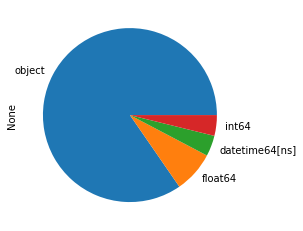

In [18]:
data_types(data_winter)

## Data session 2 : Saison été

In [ ]:
#recuperation des data 
path = "./etudfinal.ods"
df_s2 = read_ods(path)

#### Analyse du dataset 


In [ ]:
# Taille de la dataset 
# obtaining the number of rows
print("number of rows : ", df_s2.shape[0])
 
# obtaining the number of columns
print("number of columns : ", df_s2.shape[1])

number of rows :  1191
number of columns :  27


In [ ]:
#affichage des 5 premières lignes 
df_s2.head(5)

,Horodateur,unnamed.1,unnamed.2,Boutique,code postal,Depuis combien de temps êtes vous un client de la Maison Pariès ?,A quelle fréquence venez-vous nous rendre visite ?,Comment nous avez-vous connus ?,"En 2 mots, comment définiriez-vous la Maison ?",A quelle(s) occasion(s) effectuez-vous des achats chez nous,...,Pourquoi ?.1,Que devons-nous faire pour progresser ?,"14. Dans les grandes évolutions de la consommation, quelles sont les 3 qui vous tiennent le plus à cœur ?",Sexe,Quelle est votre catégorie socio-professionnelle ?,Tranche d'âge,de combien de personnes se compose votre foyer ?,"S'il y a des enfants dans votre foyer, quel âge ont-ils ?",Êtes-vous abonné à notre newsletter ?,"Si non, confiez-moi votre adresse mail pour recevoir notre actualité (moins de 10 mails par an)"
0,2022-06-08T12:11:42,2022-06-07,PT12H06M00S,St Jean,31410.0,Depuis quelques années,visite exceptionnelle,bouche à oreille,Accueillant,pour me faire plaisir; pour régaler ma famille,...,Associé à la région,Je ne sais pas,"Alimentation durable (naturalité, moins de gas...",Femme,Retraité,65 et +,2.0,None,Non,None
1,2022-06-08T12:17:46,2022-06-08,PT12H12M00S,St Jean,64500.0,Depuis toujours,visite exceptionnelle,"avec vos parents, votre famille",Bon; Fiable,pour me faire plaisir; pour régaler ma famille...,...,None,Je ne sais pas,Alimentation santé bien être et transparence,Femme,Retraité,65 et +,2.0,None,Non,None
2,2022-06-08T12:30:12,2022-06-08,PT12H23M00S,St Jean,62400.0,Depuis quelques années,visite mensuelle,par hasard en passant devant,Plaisant,pour me faire plaisir,...,None,Gateau basque plus épais,"Alimentation durable (naturalité, moins de gas...",Femme,Employé,25/34,2.0,None,Non,**********
3,2022-06-08T12:41:39,2022-06-08,PT12H30M00S,St Jean,33820.0,Depuis quelques années,visite exceptionnelle,par hasard en passant devant,Alléchant,pour me faire plaisir; pour faire un cadeau,...,Se faire plaisir plus souvent,Gateau basque plus épais,"Alimentation durable (naturalité, moins de gas...",Homme,Retraité,50/64,2.0,None,Non,None
4,2022-06-08T12:54:14,2022-06-08,PT12H47M00S,St Jean,64210.0,Depuis quelques années,visite exceptionnelle,par hasard en passant devant; bouche à oreille,Savoureux; Raffiné,pour me faire plaisir; pour faire un cadeau,...,None,Baisser les prix; Diversifier les parfums de g...,"Alimentation durable (naturalité, moins de gas...",Femme,Employé,25/34,2.0,None,Non,None


In [ ]:
#nombres valeurs par colones 
df_s2.count()

Horodateur                                                                                                     1191
unnamed.1                                                                                                      1191
unnamed.2                                                                                                      1191
Boutique                                                                                                       1191
code postal                                                                                                    1191
Depuis combien de temps êtes vous un client de la Maison Pariès ?                                              1191
A quelle fréquence venez-vous nous rendre visite ?                                                             1191
Comment nous avez-vous connus ?                                                                                1191
En 2 mots, comment définiriez-vous la Maison ?                          

In [ ]:
#valeurs manques en pourcentage 
df_s2.isna().sum() * 100 / len(df_s2)

Horodateur                                                                                                      0.000000
unnamed.1                                                                                                       0.000000
unnamed.2                                                                                                       0.000000
Boutique                                                                                                        0.000000
code postal                                                                                                     0.000000
Depuis combien de temps êtes vous un client de la Maison Pariès ?                                               0.000000
A quelle fréquence venez-vous nous rendre visite ?                                                              0.000000
Comment nous avez-vous connus ?                                                                                 0.000000
En 2 mots, comment définiriez-vo

In [ ]:
#type des données par colone
df_s2.dtypes

Horodateur                                                                                                      object
unnamed.1                                                                                                       object
unnamed.2                                                                                                       object
Boutique                                                                                                        object
code postal                                                                                                     object
Depuis combien de temps êtes vous un client de la Maison Pariès ?                                               object
A quelle fréquence venez-vous nous rendre visite ?                                                              object
Comment nous avez-vous connus ?                                                                                 object
En 2 mots, comment définiriez-vous la Maison ?  

In [ ]:
#Supprimer des colones insignifiantes 
#df_s2_new = df_s2.drop[""]

In [ ]:
df_s2[["Pourquoi ?.1"]].isna().sum() * 100/ len(df_s2)

Pourquoi ?.1    78.421495
dtype: float64

In [ ]:
#renommer la colone unamed.1 par date 
df_s2.rename(columns = {'unnamed.1':'Date'}, inplace = True)

In [ ]:
#parcourir colonne par colonne 
df_s2["Horodateur"].value_counts().sum()

1191

In [ ]:
df_s2["Date"].value_counts()

2022-07-03    63
2022-06-24    55
2022-07-31    51
2022-06-22    47
2022-06-14    42
2022-06-25    41
2022-06-08    41
2022-06-30    41
2022-07-01    37
2022-07-07    37
2022-06-28    35
2022-06-11    33
2022-07-29    33
2022-02-08    32
2022-06-20    30
2022-06-09    30
2022-07-04    30
2022-07-08    30
7/22/2022     29
7/26/2022     29
2022-07-12    28
2022-06-27    28
2022-07-16    28
2022-06-17    27
2022-07-17    26
7/21/2022     25
2022-06-10    21
2022-07-09    21
2022-07-27    20
2022-06-18    20
2022-07-11    20
2022-07-15    19
2022-06-15    17
2022-06-21    16
2022-03-08    16
2022-08-01    15
2022-07-05    15
2022-04-08    15
2022-06-13    14
7/25/2022     12
2022-07-19    12
2022-07-18     7
2022-07-26     1
2022-08-06     1
2022-06-07     1
Name: Date, dtype: int64

In [ ]:
df_s2["14. Dans les grandes évolutions de la consommation, quelles sont les 3 qui vous tiennent le plus à cœur ?"].value_counts()

Alimentation santé bien être et transparence; Tradition et authenticité; Localisme (consommation locale, circuits courts, relations avec le primeur l’artisan)                                                                                                                                                                           204
Alimentation durable (naturalité, moins de gaspillage, préoccupations écologiques et éthiques); Tradition et authenticité; Localisme (consommation locale, circuits courts, relations avec le primeur l’artisan)                                                                                                                         189
Faire soi-même; Tradition et authenticité; Localisme (consommation locale, circuits courts, relations avec le primeur l’artisan)                                                                                                                                                                                                         121
A

#### **New data with columns of interest** 

#### **Graph (SEXE) : pourcentage homme & femme (été & hiver)**

In [ ]:
data_sexe =df_s2["Sexe"]

In [ ]:
data_sexe = pd.DataFrame(data_sexe)

In [ ]:
data_sexe.rename(columns={"Sexe":"Sex_summer"},inplace=True)

In [ ]:
data_sexe

,Sex_summer
0,Femme
1,Femme
2,Femme
3,Homme
4,Femme
...,...
1186,Homme
1187,Homme
1188,Femme
1189,Femme


In [ ]:
sexe=df_s1["Sexe"]

In [ ]:
data_sexe = data_sexe.join(sexe)

In [ ]:
data_sexe.rename(columns={"Sexe":"Sexe_winter"},inplace=True)

In [ ]:
data_sexe.value_counts()

Sex_summer  Sexe_winter 
Femme       Femme           132
            Homme            49
Homme       Femme            48
            Homme            13
Femme       Femme, Homme      3
dtype: int64

In [ ]:
df_S= data_sexe[["Sex_summer"]].sample(245).reset_index()

In [ ]:
df_S = pd.concat([df_S,data_sexe[['Sexe_winter']]],axis=1).head(245)

In [ ]:
#Calcul des pourcentages hommes & femmes 
Sumer_percent = df_S["Sex_summer"].value_counts()*100 /len(df_S)
Winter_percent = df_S["Sexe_winter"].value_counts()* 100/len(df_S)

In [ ]:
print(Sumer_percent)
print(Winter_percent) 

Femme    71.020408
Homme    28.979592
Name: Sex_summer, dtype: float64
Femme           73.469388
Homme           25.306122
Femme, Homme     1.224490
Name: Sexe_winter, dtype: float64


In [ ]:
plt.hist([Sumer_percent, Winter_percent], bins=5, color = ['yellow', 'green'],label = ['Sumer', 'Winter'])
plt.legend();

NameError: name 'plt' is not defined

#### **Graph (SEXE) : pourcentage tranche âge (été & hiver)**